In [1]:
# https://github.com/huggingface/deep-rl-class/blob/main/unit1/unit1.ipynb

In [2]:
from datetime import datetime as dt
# Virtual display
from pyvirtualdisplay import Display
import gym
from huggingface_sb3 import load_from_hub, package_to_hub, push_to_hub
from huggingface_hub import notebook_login # To log to our Hugging Face account to be able to upload models to the Hub.
from stable_baselines3 import A2C, DDPG, DQN, HER, PPO, SAC, TD3
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.env_util import make_vec_env
import stable_baselines3
import numpy as np

2022-05-13 18:42:27.321783: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [4]:
# Create environment
env = gym.make('LunarLander-v2')
stable_baselines3.common.utils.get_device()

device(type='cuda')

In [5]:
def get_seed():
    np.random.seed()
    return np.random.randint(0, 2**32)

In [6]:
def train(model, seed, name_postfix):
    print(dt.now())
    model.learn(total_timesteps=500000, tb_log_name="first_run_"+name_postfix)
    print(dt.now())
    # Save the model
    model_name = "ppo-LunarLander-v2_"+name_postfix
    model.save(model_name)

    #@title
    eval_env = gym.make("LunarLander-v2")
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
    print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

In [7]:
log_dir = "./logs/"

In [8]:
seed = get_seed()

In [9]:
model = A2C(
    policy = 'MlpPolicy',
    env = env,    
    tensorboard_log=log_dir,    
    verbose=0,
    seed=seed,
    device='cuda'
)
train(model, seed, 'A2C-Mlp')

2022-05-13 18:42:30.705846
2022-05-13 19:03:22.463088


/home/alex/anaconda3/envs/deep-rl-class/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:65: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


mean_reward=-78.79 +/- 78.37938954761691


```
model = DDPG(
    policy = 'MlpPolicy',
    env = env,    
    tensorboard_log=log_dir,    
    verbose=0,
    seed=seed,
    device='cuda'
)
train(model, seed, 'DDPG-Mlp')
```

In [11]:
model = DQN(
    policy = 'MlpPolicy',
    env = env,    
    tensorboard_log=log_dir,    
    verbose=0,
    seed=seed,
    device='cuda'
)
train(model, seed, 'DQN-Mlp')

2022-05-13 19:05:26.280958
2022-05-13 19:20:49.929308
mean_reward=62.92 +/- 109.11000672873968


```
model = HER(
    policy = 'MlpPolicy',
    env = env,    
    tensorboard_log=log_dir,    
    verbose=0,
    seed=seed,
    device='cuda'
)
train(model, seed, 'HER-Mlp')
```

In [13]:
model = PPO(
    policy = 'MlpPolicy',
    env = env,    
    tensorboard_log=log_dir,    
    verbose=0,
    seed=seed,
    device='cuda'
)
train(model, seed, 'PPO-Mlp')

2022-05-13 19:25:43.897594
2022-05-13 19:43:12.044003
mean_reward=162.13 +/- 92.79310906097845


```
model = SAC(
    policy = 'MlpPolicy',
    env = env,    
    tensorboard_log=log_dir,    
    verbose=0,
    seed=seed,
    device='cuda'
)
train(model, seed, 'SAC-Mlp')
```

```
model = TD3(
    policy = 'MlpPolicy',
    env = env,    
    tensorboard_log=log_dir,    
    verbose=0,
    seed=seed,
    device='cuda'
)
train(model, seed, 'TD3-Mlp')
```

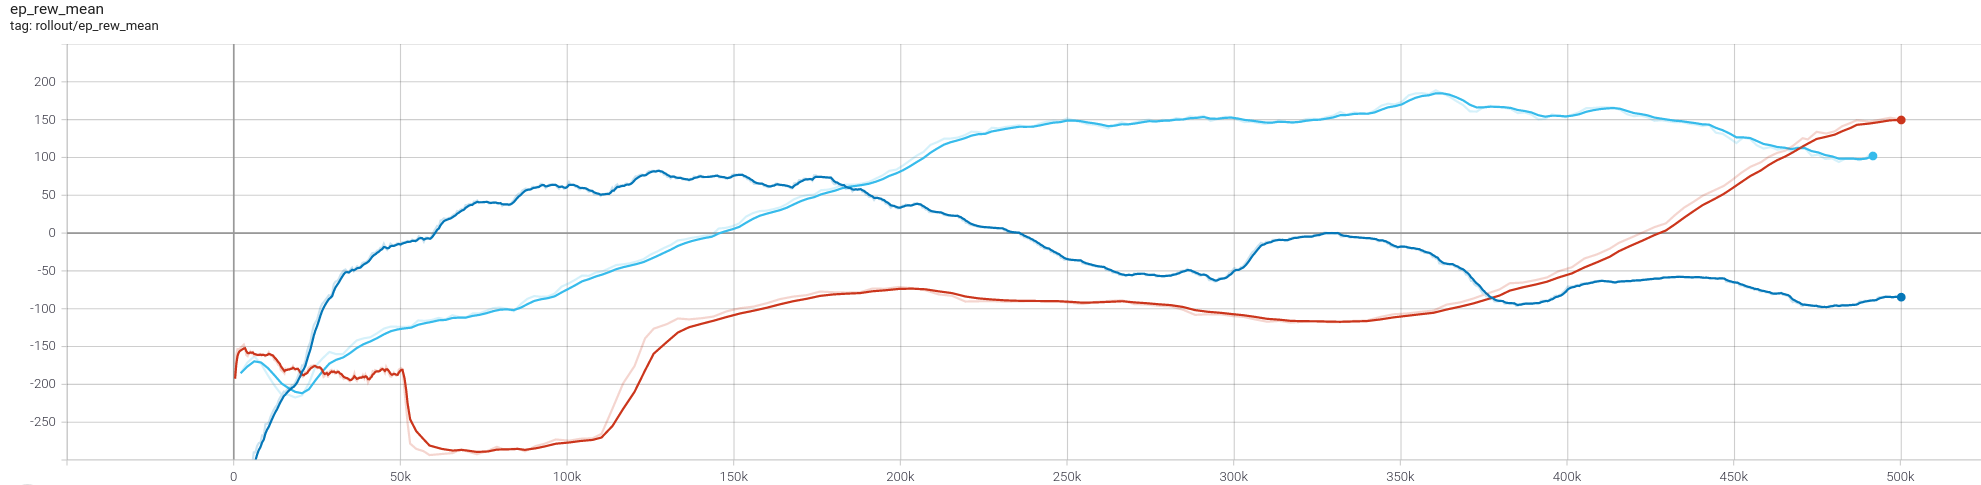

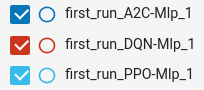